<a href="https://colab.research.google.com/github/Yumna10/Social-Media-DA/blob/main/Social_Media_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Exploratory Data Analysis


In [140]:
df = pd.read_csv("social_media_data.csv",encoding="UTF8")
df.head()

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2000 non-null   object 
 1   platform   2000 non-null   object 
 2   post_type  2000 non-null   object 
 3   likes      1992 non-null   float64
 4   shares     1992 non-null   float64
 5   comments   1992 non-null   float64
 6   views      1990 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [143]:
df.shape

(2000, 7)

In [144]:
df.columns

Index(['date', 'platform', 'post_type', 'likes', 'shares', 'comments',
       'views'],
      dtype='object')

In [145]:
df.isnull().sum()

date          0
platform      0
post_type     0
likes         8
shares        8
comments      8
views        10
dtype: int64

#Data Cleaning

In [146]:
df[df.isnull().any(axis=1)]

,date,platform,post_type,likes,shares,comments,views
8,2023-01-09,Twitter,text,1746.0,NaN,356.0,NaN
18,2023-05-28,Instagram,video,1588.0,279.0,352.0,NaN
36,2023-07-10,Facebook,video,NaN,895.0,341.0,5521.0
59,2023-02-16,Instagram,text,640.0,559.0,NaN,7495.0
80,2022-12-17,Instagram,image,1964.0,NaN,500.0,4621.0
105,2023-07-21,Twitter,text,1075.0,232.0,253.0,NaN
116,2023-09-06,Facebook,text,857.0,NaN,376.0,8609.0
149,2023-02-16,Facebook,video,1528.0,443.0,NaN,9042.0
182,2023-08-12,Twitter,text,NaN,208.0,136.0,6571.0
268,2022-11-10,Instagram,text,NaN,398.0,238.0,4783.0


We will drop the rows that contain NaN values ​​for the views column, because it is illogical for a post to have interactions when it does not contain any views.

In [147]:
nan_views_df = df[df['views'].isna()]
nan_views_count = df['views'].isna().sum()
print(nan_views_df)
print("Number of rows with NaN in 'views' column:", nan_views_count)

            date   platform post_type   likes  shares  comments  views
8     2023-01-09    Twitter      text  1746.0     NaN     356.0    NaN
18    2023-05-28  Instagram     video  1588.0   279.0     352.0    NaN
105   2023-07-21    Twitter      text  1075.0   232.0     253.0    NaN
774   2023-01-19    Twitter     image   497.0   602.0     408.0    NaN
1469  2023-06-03  Instagram     video   639.0   300.0     180.0    NaN
1574  2023-09-14   Facebook     video  1400.0   273.0     445.0    NaN
1643  2023-08-21   Facebook      text   963.0   851.0     163.0    NaN
1721  2023-01-03   Facebook     video   891.0   280.0     163.0    NaN
1785  2023-06-26  Instagram     image  1916.0   639.0     419.0    NaN
1980  2023-10-04   Facebook     video  2166.0   790.0     352.0    NaN
Number of rows with NaN in 'views' column: 10


In [148]:
df = df.dropna(subset=['views'])
print(df)

            date   platform post_type   likes  shares  comments   views
0     2023-05-24    Twitter     image   868.0   238.0     352.0  8836.0
1     2023-02-23    Twitter     image   944.0   610.0     146.0  5554.0
2     2023-03-18  Instagram     image  1067.0   858.0     365.0  4018.0
3     2023-06-12    Twitter      text   780.0   427.0     100.0  6999.0
4     2023-02-03  Instagram      text   836.0   893.0     443.0  5802.0
...          ...        ...       ...     ...     ...       ...     ...
1995  2023-01-15   Facebook     video  2039.0   523.0     371.0  4780.0
1996  2022-11-13    Twitter     image  1652.0   891.0     410.0  8741.0
1997  2023-09-18    Twitter     video   528.0   207.0     341.0  6588.0
1998  2023-04-23   Facebook     video  1288.0   893.0     328.0  8349.0
1999  2023-08-13    Twitter     image   835.0   532.0     424.0  9236.0

[1990 rows x 7 columns]


In [149]:
df.duplicated().sum()

0

#1. What was the total number of likes, shares, comments, and views (for videos) over the year?


In [150]:
video_data = df[df['post_type'] == 'video']

total_likes = video_data['likes'].sum()
total_shares = video_data['shares'].sum()
total_comments = video_data['comments'].sum()
total_views = video_data['views'].sum()

print(f"Total likes for videos: {total_likes}")
print(f"Total shares for videos: {total_shares}")
print(f"Total comments for videos: {total_comments}")
print(f"Total views for videos: {total_views}")

Total likes for videos: 809486.0
Total shares for videos: 309118.0
Total comments for videos: 192647.0
Total views for videos: 4464731.0


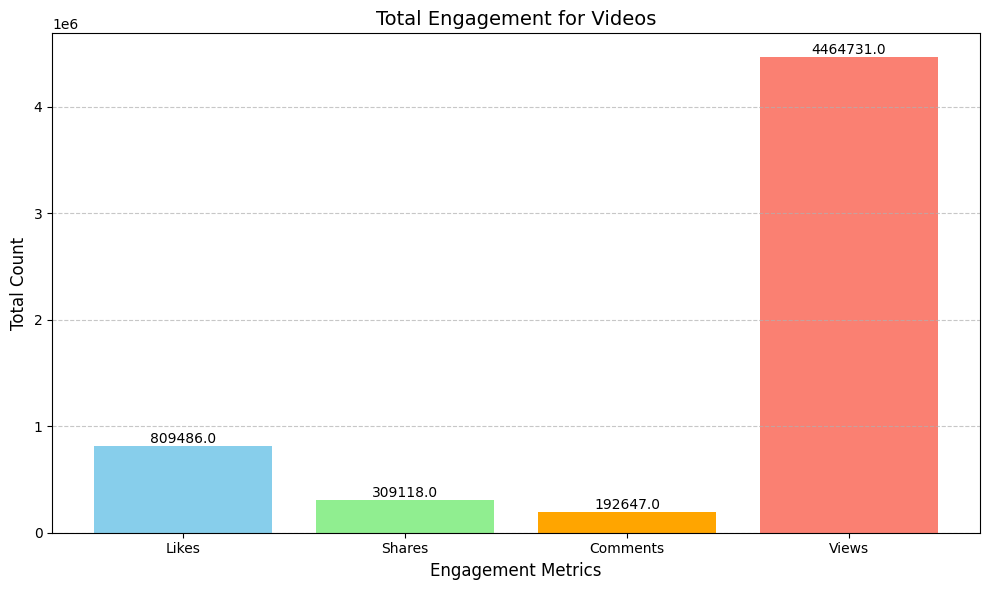

In [151]:
categories = ['Likes', 'Shares', 'Comments', 'Views']
totals = [total_likes, total_shares, total_comments, total_views]
colors = ['skyblue', 'lightgreen', 'orange', 'salmon']

plt.figure(figsize=(10, 6))
plt.bar(categories, totals, color=colors)
plt.xlabel('Engagement Metrics', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.title('Total Engagement for Videos', fontsize=14)

for i, total in enumerate(totals):
    plt.text(i, total + 10, str(total), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#2. Which platform had the highest engagement? (engagement = likes + shares + comments)


In [152]:
platform_stats_df = pd.DataFrame(df)
platform_stats_df['engagement'] = df['likes'] + df['shares'] + df['comments']

highest_engagement_platform = platform_stats_df.loc[platform_stats_df['engagement'].idxmax(), 'platform']
highest_engagement_value = platform_stats_df['engagement'].max()

print(f"The platform with the highest engagement is '{highest_engagement_platform}' with an engagement of {highest_engagement_value}.")

The platform with the highest engagement is 'Facebook' with an engagement of 3449.0.


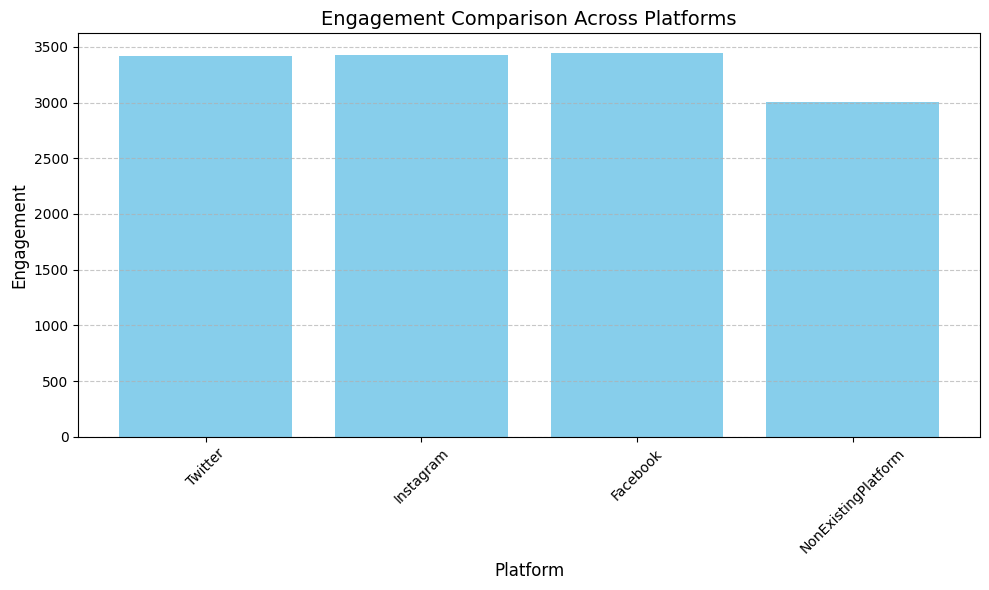

In [154]:
plt.figure(figsize=(10, 6))
plt.bar(platform_stats_df['platform'], platform_stats_df['engagement'], color='skyblue')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Engagement', fontsize=12)
plt.title('Engagement Comparison Across Platforms', fontsize=14)

plt.annotate(f'Highest: {highest_engagement_value}',
             xy=(platform_stats_df.index[platform_stats_df['platform'] == highest_engagement_platform][0], highest_engagement_value),
             xytext=(0, 20), textcoords='offset points', ha='center', va='bottom',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#3. What was the average number of likes, shares, comments, and views per post on each platform?


In [155]:
avg_stats_per_platform = df.groupby('platform').mean(numeric_only=True).round(2)

print("Average number of likes, shares, comments, and views per post on each platform:")
print(avg_stats_per_platform)

Average number of likes, shares, comments, and views per post on each platform:
                       likes  shares  comments    views
platform                                               
Facebook             1289.56  512.92    311.35  6984.24
Instagram            1305.50  497.78    300.97  6905.88
NonExistingPlatform  1150.17  515.83    285.50  6729.17
Twitter              1275.74  482.63    305.71  7013.26


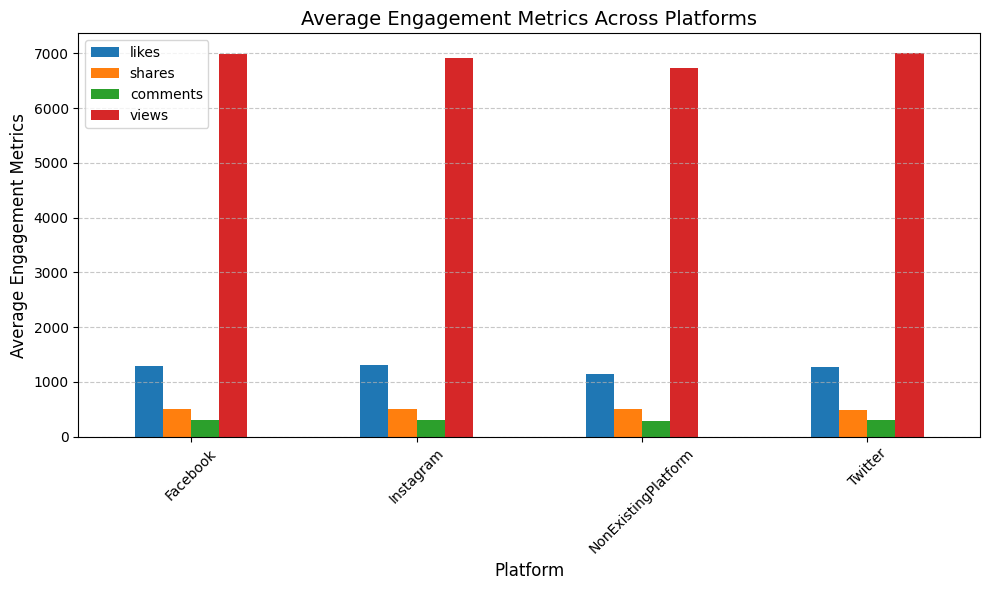

In [156]:
avg_stats_per_platform.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Engagement Metrics', fontsize=12)
plt.title('Average Engagement Metrics Across Platforms', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4. What was the total number of each type of post (video, image, text) on each platform?


In [157]:
post_counts = df.groupby(['platform', 'post_type']).size().reset_index(name='count')

print("Total number of each type of post (video, image, text) on each platform:")
print(post_counts)

Total number of each type of post (video, image, text) on each platform:
               platform post_type  count
0              Facebook     image    218
1              Facebook      text    203
2              Facebook     video    206
3             Instagram     image    266
4             Instagram      text    203
5             Instagram     video    206
6   NonExistingPlatform     image      1
7   NonExistingPlatform      text      3
8   NonExistingPlatform     video      2
9               Twitter     image    248
10              Twitter      text    217
11              Twitter     video    217


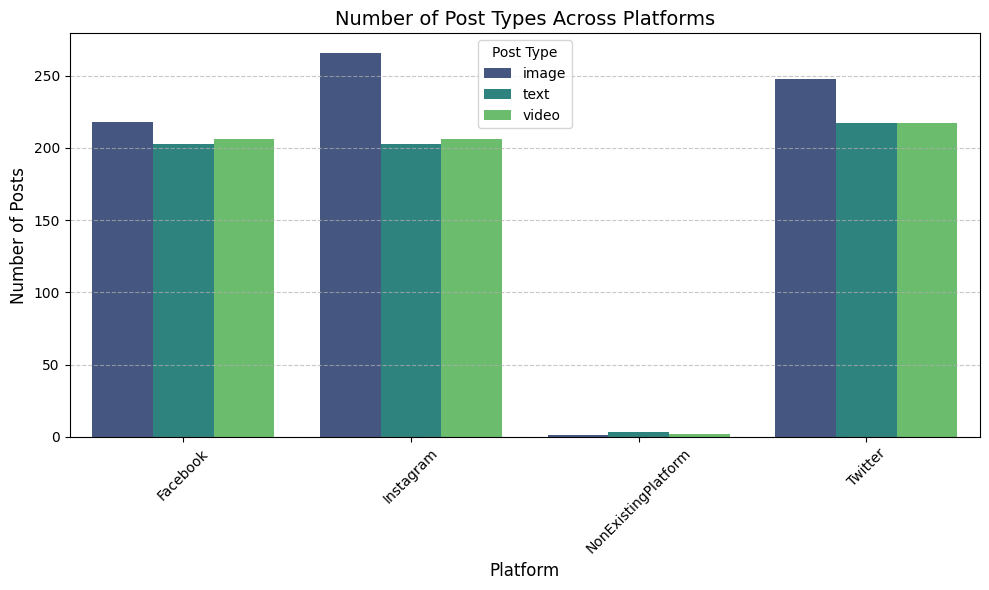

In [158]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='count', hue='post_type', data=post_counts, palette='viridis')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.title('Number of Post Types Across Platforms', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Post Type')
plt.show()

#5. Which type of post had the highest average engagement?


In [159]:
df['engagement'] = df['likes'] + df['shares'] + df['comments']

avg_engagement_by_type = df.groupby('post_type')['engagement'].mean()

highest_avg_engagement_type = avg_engagement_by_type.idxmax()
highest_avg_engagement_value = avg_engagement_by_type.max()

print(f"The type of post with the highest average engagement is '{highest_avg_engagement_type}' with an average engagement of {highest_avg_engagement_value:.2f}.")

The type of post with the highest average engagement is 'text' with an average engagement of 2129.71.


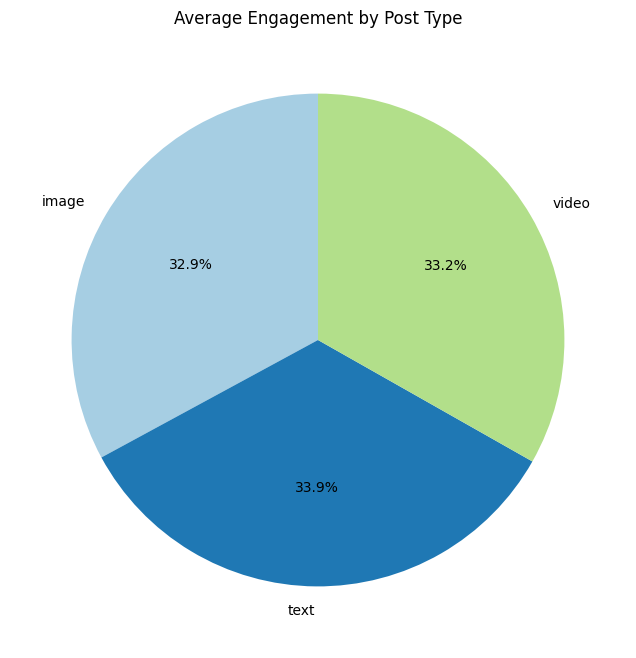

In [160]:
df['engagement'] = df['likes'] + df['shares'] + df['comments']

engagement_by_type = df.groupby('post_type')['engagement'].mean()

plt.figure(figsize=(8, 8))
plt.pie(engagement_by_type, labels=engagement_by_type.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Engagement by Post Type')
plt.show()

#6. What was the total engagement in each quarter of the year?


In [163]:
df['date'] = pd.to_datetime(df['date'])

df['quarter'] = df['date'].dt.quarter
quarterly_engagement = df.groupby('quarter')['engagement'].sum()

print("Total engagement in each quarter of the year (excluding 2022):")
print(quarterly_engagement)

Total engagement in each quarter of the year (excluding 2022):
quarter
1    1022540.0
2     994332.0
3     972717.0
4    1128103.0
Name: engagement, dtype: float64


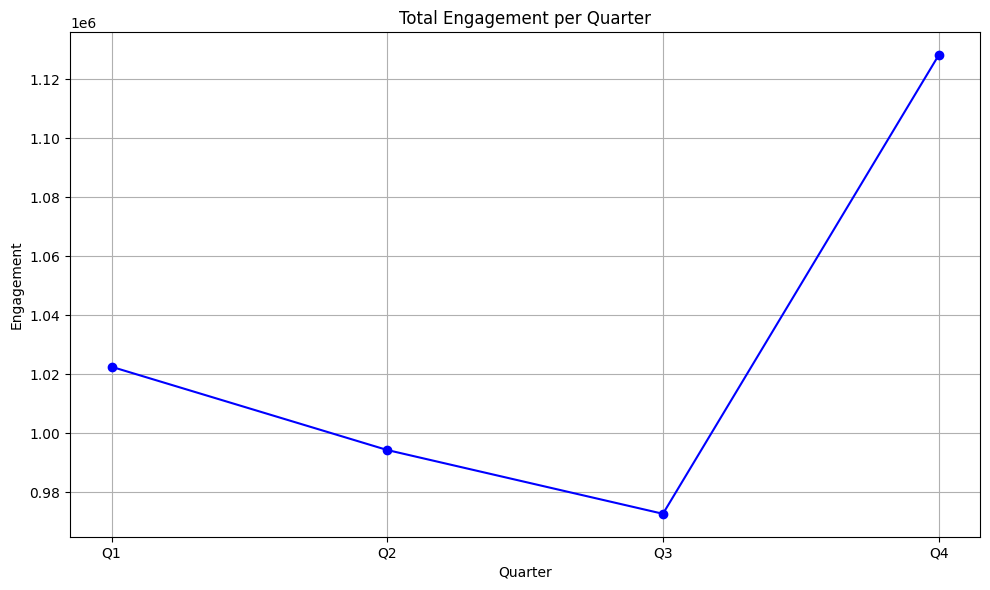

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(quarters, quarterly_engagement, marker='o', linestyle='-', color='b')
plt.title('Total Engagement per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Engagement')
plt.grid(True)
plt.tight_layout()
plt.show()